In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

-----
<p style='color:red'> # 1. train_users.csv & test_users.csv</p>
-----

In [2]:
train_df = pd.read_csv('./data/train_users_2.csv')
test_df = pd.read_csv('./data/test_users.csv')

In [3]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### Feature Enginnering Flow
1. datetime
2. age
3. categorical
    - One-hot encoding
        - ```pd.get_dummies()```
4. remove NaN 많은 column
    - drop

## 0. dtype transform

### 0.1. Datetime

In [5]:
train_df['date_account_created'] = pd.to_datetime(train_df.date_account_created)
test_df['date_account_created'] = pd.to_datetime(test_df.date_account_created)

In [6]:
tr_tfa_str = train_df.timestamp_first_active.values.astype('str')
train_df['timestamp_first_active'] = pd.to_datetime(tr_tfa_str)
te_tfa_str = test_df.timestamp_first_active.values.astype('str')
test_df['timestamp_first_active'] = pd.to_datetime(te_tfa_str)

### 0.2. Drop NaN columns

In [7]:
train_df.drop(['date_first_booking','country_destination'],axis=1, inplace=True)
test_df.drop(['date_first_booking'],axis=1, inplace=True)

### 0.3. Concat train_df & test_df

In [8]:
df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
df.shape

(275547, 14)

## 1. Datetime --- One-hot Encoding

### 1.1 timestamp_first_active

In [9]:
df['tfa_year'] = np.array([x.year for x in df.timestamp_first_active])
df['tfa_month'] = np.array([x.month for x in df.timestamp_first_active])
df['tfa_day'] = np.array([x.day for x in df.timestamp_first_active])

In [10]:
df['tfa_wd'] = np.array([x.isoweekday() for x in df.timestamp_first_active])
# return weekdays as 1,2,3,4,5,6,7 = mon ~ sun
tfa_wd_df = pd.get_dummies(df.tfa_wd, prefix='tfa_wd')
# return a dataframe 
df = pd.concat((df,tfa_wd_df),axis=1)
# new df = previous df + onhot-encoding df
df.drop(['tfa_wd'], axis=1, inplace=True)
# remove tfa_wd column, use onehot-encoded feature columns

In [11]:
def season(tfa):
    month = tfa.month
    if month in [3,4,5]:
        label = 'Spring'
    elif month in [6,7,8]:
        label = 'Summer'
    elif month in [9,10,11]:
        label = 'Autumn'
    else: label = 'Winter'
    return label   
    
df['tfa_season'] = df.timestamp_first_active.apply(season)
tfa_season_df = pd.get_dummies(df.tfa_season, prefix='tfa_season')
df = pd.concat((df, tfa_season_df),axis=1)
df.drop(['tfa_season'],axis=1,inplace=True)

### 1.2 date_account_created

In [12]:
df['dac_year'] = np.array([x.year for x in df.date_account_created])
df['dac_month'] = np.array([x.month for x in df.date_account_created])
df['dac_day'] = np.array([x.day for x in df.date_account_created])

In [13]:
df['dac_wd'] = np.array([x.isoweekday() for x in df.date_account_created])
dac_wd_df = pd.get_dummies(df.dac_wd, prefix='dac_wd')
df = pd.concat((df,dac_wd_df),axis=1)
df.drop(['dac_wd'],axis=1,inplace=True)

In [14]:
df['dac_season'] = df.date_account_created.apply(season)
dac_season_df = pd.get_dummies(df.dac_season,prefix='dac_season')
df = pd.concat((df,dac_season_df),axis=1)
df.drop(['dac_season'],axis=1,inplace=True)

In [15]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Autumn,dac_season_Spring,dac_season_Summer,dac_season_Winter
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,0,1,0,0,0,0,0,1,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,1,0,0,0,0,0,1,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,0,1
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,1,0,0,0,0,0,1,0,0,0


In [16]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'tfa_year', 'tfa_month',
       'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3', 'tfa_wd_4', 'tfa_wd_5',
       'tfa_wd_6', 'tfa_wd_7', 'tfa_season_Autumn', 'tfa_season_Spring',
       'tfa_season_Summer', 'tfa_season_Winter', 'dac_year', 'dac_month',
       'dac_day', 'dac_wd_1', 'dac_wd_2', 'dac_wd_3', 'dac_wd_4', 'dac_wd_5',
       'dac_wd_6', 'dac_wd_7', 'dac_season_Autumn', 'dac_season_Spring',
       'dac_season_Summer', 'dac_season_Winter'],
      dtype='object')

### 1.3 Time Span between dac and tfa

In [17]:
# Series.dt.day -> The days of the datetime

In [18]:
dt_span = df.date_account_created.subtract(df.timestamp_first_active).dt.days

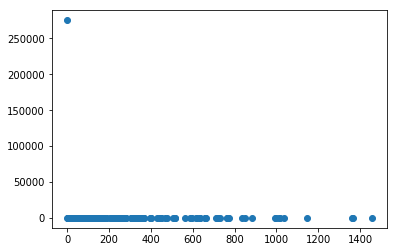

In [19]:
plt.scatter(dt_span.value_counts().index, dt_span.value_counts().values)

In [20]:
def time_span(var):
    if var == -1:
        label = 'Oneday'
    elif var <= 30:
        label = 'Onemonth'
    elif var <= 365:
        label = 'Oneyear'
    else: label = 'Other'
    return label

time_span_label = dt_span.apply(time_span)

In [21]:
time_span_label.value_counts()

Oneday      275369
Oneyear         88
Other           47
Onemonth        43
dtype: int64

In [22]:
df['time_span'] = time_span_label

In [23]:
time_span_df = pd.get_dummies(df.time_span, prefix='time_span')
df = pd.concat((df,time_span_df),axis=1)
df.drop(['time_span'],axis=1,inplace=True)

### 1.4 Remove dac & tfa columns after feature enginnering

In [24]:
df.drop(['date_account_created','timestamp_first_active'],axis=1,inplace=True)

## 2.  Age --- One-hot Encoding

In [25]:
df['age'].fillna(-1,inplace=True)

In [26]:
df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,dac_wd_6,dac_wd_7,dac_season_Autumn,dac_season_Spring,dac_season_Summer,dac_season_Winter,time_span_Oneday,time_span_Onemonth,time_span_Oneyear,time_span_Other
0,gxn3p5htnn,-unknown-,-1.0,facebook,0,en,direct,direct,untracked,Web,...,0,0,0,0,1,0,0,0,0,1
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,0,0,0,1,0,0,0,0,0,1
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,0,0,1,0,0,0,0,0,0,1
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,0,0,0,0,0,1,0,0,0,1
4,87mebub9p4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,...,0,0,1,0,0,0,0,0,1,0


In [27]:
age_series = df['age']

In [28]:
def age(val):
    if (val>1900)&(val<2010):
        label = 2018-val
    else: label = val
    return label

age_no_1000 = age_series.apply(age)

In [29]:
def age_range(age):
    base = 15
    if age == -1:
        label = 'NaN'
    elif age < base:
        label = base
    elif age < base *2:
        label = base *2
    elif age < base *3:
        label = base *3
    elif age < base *4:
        label = base *4
    elif age < base *5:
        label = base *5
    elif age < base *6:
        label = base *6
    elif age < base *7:
        label = base *7
    else: label = 'Unpysical'
    return label

age_label = age_no_1000.apply(age_range)
age_label.value_counts()

NaN          116866
45            72824
30            51760
60            23171
75             7247
Unpysical      2450
90              724
105             445
15               60
Name: age, dtype: int64

In [30]:
age_label_df = pd.get_dummies(age_label, prefix='age')
df = pd.concat((df,age_label_df),axis=1)

In [31]:
df.drop(['age'],axis=1,inplace=True)

-----
**Issue - no use --- np.where()**

```python
age = df['age'].values
age = np.where(np.logical_and(age<2010,age>1990), 2018-age, age)
age.max() => 2014
```
eg:

```arr = np.random.randn(4,4)```

```
array([[-0.32265205,  0.53133885, -1.0850594 ,  0.89857162],
       [ 0.54831018, -0.81251017, -1.14540716,  1.66426604],
       [ 0.77844041,  2.07283316, -0.32183705, -0.70056285],
       [-0.99258249, -0.32509112, -0.95094696,  0.77907217]])
```
       
       
```np.where(arr<0, -1, 1)```
```
array([[-1,  1, -1,  1],
       [ 1, -1, -1,  1],
       [ 1,  1, -1, -1],
       [-1, -1, -1,  1]])
```
-----

In [32]:
df.head()

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,time_span_Other,age_15,age_30,age_45,age_60,age_75,age_90,age_105,age_NaN,age_Unpysical
0,gxn3p5htnn,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,1,0,0,1,0,0,0,0,0,0
2,4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,1,0,0,0,1,0,0,0,0,0
3,bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,0,0,1,0,0,0,0,0,0
4,87mebub9p4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,0,0,1,0,0,0,0,0,0


## 3. Categorical features --- One-hot Encoding

In [33]:
cate_feats = ['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser']

In [34]:
for feat in cate_feats:
    feat_df = pd.get_dummies(df[feat], prefix=feat,dummy_na=True)
    df.drop([feat],axis=1,inplace=True)
    df = pd.concat((df,feat_df),axis=1)

In [35]:
df.shape

(275547, 205)

In [36]:
df.head()

,id,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,first_browser_nan
0,gxn3p5htnn,2009,3,19,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2009,5,23,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2009,6,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2009,10,31,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2009,12,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


-----
<p style='color:red'> # 2. sessions.csv</p>
-----

In [37]:
session_df = pd.read_csv('./data/sessions.csv')

In [38]:
session_df.shape

(10567737, 6)

In [39]:
session_df['id'] = session_df.user_id
session_df.drop(['user_id'],axis=1,inplace=True)
# session_df.set_index('id',inplace=True)

In [40]:
session_df.isnull().sum()

action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
id                 34496
dtype: int64

In [43]:
session_df.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NAN,NAN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NAN,NAN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NAN,NAN,Windows Desktop,435.0,d1mm9tcy42


In [42]:
session_df.secs_elapsed.fillna(0, inplace=True)
session_df.action.fillna('NAN',inplace=True)
session_df.action_type.fillna('NAN',inplace=True)
session_df.action_detail.fillna('NAN',inplace=True)
session_df.device_type.fillna('NAN',inplace=True)

In [46]:
session_df.secs_elapsed.astype(int)

0               319
1             67753
2               301
3             22141
4               435
5              7703
6               115
7               831
8             20842
9               683
10            59274
11               95
12             1399
13            74886
14              255
15             8134
16              183
17           175570
18               86
19             1535
20            83251
21              360
22             2488
23              456
24            10053
25               50
26             1996
27            82263
28              102
29              673
             ...   
10567707       3490
10567708      26491
10567709        189
10567710        698
10567711          0
10567712      21062
10567713        897
10567714         17
10567715        602
10567716        257
10567717      14711
10567718     253296
10567719      26581
10567720       2694
10567721        447
10567722     124020
10567723      22920
10567724     575816
10567725      57382


## 1. action

In [47]:
session_df.action.value_counts()

show                           2768278
index                           843699
search_results                  725226
personalize                     706824
search                          536057
ajax_refresh_subtotal           487744
update                          365130
similar_listings                364624
social_connections              339000
reviews                         320591
active                          188036
similar_listings_v2             168788
lookup                          162041
create                          155887
dashboard                       152952
header_userpic                  141830
collections                     124417
edit                            109083
campaigns                       105028
track_page_view                  81117
NAN                              79626
unavailabilities                 78317
qt2                              64651
notifications                    59392
confirm_email                    58726
requested                

In [48]:
act_dict = dict(zip(session_df.action.value_counts().index,session_df.action.value_counts().values))

In [49]:
act_dict

{'10': 3215,
 '11': 716,
 '12': 2209,
 '15': 1053,
 'NAN': 79626,
 'about_us': 416,
 'accept_decline': 2,
 'account': 9040,
 'acculynk_bin_check_failed': 1,
 'acculynk_bin_check_success': 51,
 'acculynk_load_pin_pad': 50,
 'acculynk_pin_pad_error': 4,
 'acculynk_pin_pad_inactive': 30,
 'acculynk_pin_pad_success': 5,
 'acculynk_session_obtained': 52,
 'active': 188036,
 'add_business_address_colorbox': 9,
 'add_guest_colorbox': 7,
 'add_guests': 60,
 'add_note': 961,
 'agree_terms_check': 10938,
 'agree_terms_uncheck': 598,
 'airbnb_picks': 278,
 'airbrb': 3,
 'ajax_check_dates': 52517,
 'ajax_get_referrals_amt': 11306,
 'ajax_get_results': 369,
 'ajax_google_translate': 290,
 'ajax_google_translate_description': 933,
 'ajax_google_translate_reviews': 951,
 'ajax_image_upload': 13570,
 'ajax_ldp': 19,
 'ajax_lwlb_contact': 33413,
 'ajax_payout_edit': 714,
 'ajax_payout_options_by_country': 685,
 'ajax_payout_split_edit': 7,
 'ajax_photo_widget': 8,
 'ajax_photo_widget_form_iframe': 2444

In [50]:
act_freq = 100
# a = session_df.action.apply(lambda x:'Other' if act_dict[x]<act_freq else x)
# donno how does lambda works...???

In [51]:
def act_freq(var):
    if act_dict[var] < 100:
        label = 'OTHER'
#     elif act_dict[var] > 100000:
#         label = 'TEST'
    else: label = var
    return label

session_df['action'] = session_df.action.apply(act_freq)

In [52]:
session_df.query('action=="OTHER"')

,action,action_type,action_detail,device_type,secs_elapsed,id
142,OTHER,-unknown-,-unknown-,Windows Desktop,169295.0,4grx6yxeby
327,OTHER,-unknown-,-unknown-,Windows Desktop,63154.0,5f45ro5uzk
2346,OTHER,-unknown-,-unknown-,iPad Tablet,4951.0,s9xrwtyzsq
2460,OTHER,-unknown-,-unknown-,Mac Desktop,21816.0,1ltangt0hg
2909,OTHER,-unknown-,-unknown-,iPhone,727.0,toga865pvz
2938,OTHER,-unknown-,-unknown-,iPhone,30.0,toga865pvz
3206,OTHER,-unknown-,-unknown-,iPhone,427.0,toga865pvz
3272,OTHER,-unknown-,-unknown-,iPhone,294.0,toga865pvz
3323,OTHER,-unknown-,-unknown-,iPhone,43.0,toga865pvz
3334,OTHER,-unknown-,-unknown-,iPhone,1464.0,toga865pvz


In [53]:
session_df.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NAN,NAN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NAN,NAN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NAN,NAN,Windows Desktop,435.0,d1mm9tcy42


-----
**분석용 main code 아님**

In [104]:
session_df.action_type.value_counts()

view                3560902
data                2103770
click               1996183
NaN                 1126204
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [109]:
session_df.action_detail.value_counts().index

Index(['view_search_results', 'p3', 'NaN', '-unknown-',
       'wishlist_content_update', 'user_profile',
       'change_trip_characteristics', 'similar_listings',
       'user_social_connections', 'update_listing',
       ...
       'deactivate_user_account', 'delete_listing_description',
       'delete_payment_instrument', 'host_respond', 'booking',
       'special_offer_field', 'host_refund_guest', 'host_respond_page',
       'tos_2014', 'host_standard_suspension'],
      dtype='object', length=156)

In [160]:
session_df.device_type.value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [162]:
gr_id = session_df.groupby(['id'])
for g in gr_id:
    print('g[0]',g[0])
    print('g[1]')
    print(g[1])

g[0] 00023iyk9l
g[1]
                        action       action_type                action_detail  \
3573923                  index              view          view_search_results   
3573924              dashboard              view                    dashboard   
3573925         header_userpic              data               header_userpic   
3573926              dashboard              view                    dashboard   
3573927               callback  partner_callback               oauth_response   
3573928                    NaN      message_post                 message_post   
3573929                pending   booking_request                      pending   
3573930              requested              view                           p5   
3573931              requested              view                           p5   
3573932              requested              view                           p5   
3573933              requested              view                           p5   
3573934

                         action   action_type                  action_detail  \
9915724                  delete     -unknown-                      -unknown-   
9915725       ajax_image_upload     -unknown-                      -unknown-   
9915726                  delete     -unknown-                      -unknown-   
9915727                    show          view                             p3   
9915728                    edit          view                   edit_profile   
9915729                    edit          view                   edit_profile   
9915730                    edit          view                   edit_profile   
9915731       ajax_image_upload     -unknown-                      -unknown-   
9915732             profile_pic     -unknown-                      -unknown-   
9915733                  delete     -unknown-                      -unknown-   
9915734       ajax_image_upload     -unknown-                      -unknown-   
9915735             profile_pic     -unk

                 action      action_type         action_detail  \
1059212         pending  booking_request               pending   
1059213       requested             view                    p5   
1059214       requested             view                    p5   
1059215          create           submit           create_user   
1059216  header_userpic             data        header_userpic   
1059217          create           submit  create_phone_numbers   
1059218          verify        -unknown-             -unknown-   
1059219       requested             view                    p5   
1059220             NaN     message_post          message_post   

             device_type secs_elapsed          id  
1059212  Windows Desktop         1000  007gj7kqdk  
1059213  Windows Desktop        29978  007gj7kqdk  
1059214  Windows Desktop         8234  007gj7kqdk  
1059215  Windows Desktop          NaN  007gj7kqdk  
1059216  Windows Desktop         3286  007gj7kqdk  
1059217  Windows Desktop   

                            action action_type                action_detail  \
8952806                impressions        view                           p4   
8952807                personalize        data      wishlist_content_update   
8952808                       show         NaN                          NaN   
8952809      ajax_refresh_subtotal       click  change_trip_characteristics   
8952810        similar_listings_v2         NaN                          NaN   
8952811                personalize        data      wishlist_content_update   
8952812                       show         NaN                          NaN   
8952813                personalize        data      wishlist_content_update   
8952814                      index        view          view_search_results   
8952815                personalize        data      wishlist_content_update   
8952816                      index        view          view_search_results   
8952817                      index        view      

KeyboardInterrupt: 

In [ ]:
gr_id.action
for i in gr_id.action:
    print(i.index)

In [163]:
f_act = session_df.action.value_counts().argsort()

In [164]:
f_act

show                                       230
index                                      229
search_results                             227
personalize                                228
search                                     226
ajax_refresh_subtotal                      225
update                                     224
similar_listings                           223
social_connections                         222
reviews                                    221
active                                     220
similar_listings_v2                        219
lookup                                     218
create                                     217
dashboard                                  216
header_userpic                             215
collections                                214
edit                                       213
campaigns                                  212
track_page_view                            211
NaN                                        210
unavailabilit

In [165]:
for i,v in enumerate(g[1].action.values):
    print(i,'-',v)

0 - search
1 - search
2 - social_connections
3 - show
4 - show
5 - show
6 - search
7 - show
8 - show
9 - social_connections
10 - show
11 - show
12 - reviews
13 - show
14 - reviews
15 - reviews
16 - show
17 - social_connections
18 - show
19 - show
20 - reviews
21 - show
22 - show
23 - show
24 - social_connections
25 - show
26 - show
27 - reviews
28 - show
29 - reviews
30 - create
31 - active
32 - campaigns
33 - show
34 - show


In [192]:
f_act['click']

190

In [193]:
c_act = [0] * len(f_act)

In [194]:
c_act

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [195]:
c_act[f_act['click']]+=1

In [196]:
c_act

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [183]:
c_act_uqc = np.unique(g[1].action.values)
c_act_uqc

array(['active', 'campaigns', 'create', 'reviews', 'search', 'show',
       'social_connections'], dtype=object)

In [186]:
c_act_uqc = np.unique(g[1].action.values,return_counts=True)
c_act_uqc

(array(['active', 'campaigns', 'create', 'reviews', 'search', 'show',
        'social_connections'], dtype=object),
 array([ 1,  1,  1,  6,  3, 19,  4]))

In [187]:
_, c_act_uqc = np.unique(g[1].action.values,return_counts=True)

In [188]:
c_act_uqc

array([ 1,  1,  1,  6,  3, 19,  4])

In [189]:
len(c_act_uqc)

7

In [190]:
np.mean(c_act_uqc)

5.0

In [197]:
np.std(c_act_uqc)

5.976143046671968

In [199]:
c_act += [len(c_act_uqc),np.mean(c_act_uqc),np.std(c_act_uqc)]

In [200]:
c_act

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 5.0,
 5.976143046671968]

==========**끝**==========

-----

In [54]:
session_df.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NAN,NAN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NAN,NAN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NAN,NAN,Windows Desktop,435.0,d1mm9tcy42


In [55]:
f_act = session_df.action.value_counts().argsort()
f_act_type = session_df.action_type.value_counts().argsort()
f_act_detail = session_df.action_detail.value_counts().argsort()
f_dev_type = session_df.device_type.value_counts().argsort()

In [56]:
print(f_act.shape)
print(f_act_type.shape)
print(f_act_detail.shape)
print(f_dev_type.shape)

(231,)
(11,)
(156,)
(14,)


In [57]:
groupby_sess = session_df.groupby(['id'])

In [58]:
len(groupby_sess)

135483

In [59]:
session_df.shape

(10567737, 6)

In [60]:
session_df.secs_elapsed.value_counts().head()

0.0    240655
1.0     27378
2.0     23004
3.0     20375
5.0     19589
Name: secs_elapsed, dtype: int64

In [61]:
# def nan2zero(val):
#     if type(val) != int:
#         label = 0
#     else: label = val
#     return label
# session_df.secs_elapsed.apply(nan2zero)

In [62]:
session_df.query('secs_elapsed == 0')

,action,action_type,action_detail,device_type,secs_elapsed,id
45,NAN,message_post,message_post,Windows Desktop,0.0,d1mm9tcy42
128,create,submit,create_user,Mac Desktop,0.0,yo8nz8bqcq
137,create,submit,create_user,Windows Desktop,0.0,4grx6yxeby
163,create,submit,create_user,Windows Desktop,0.0,ncf87guaf0
194,personalize,data,wishlist_content_update,Windows Desktop,0.0,ncf87guaf0
306,create,-unknown-,-unknown-,iPhone,0.0,4rvqpxoh3h
314,create,submit,create_user,iPad Tablet,0.0,c8mfesvkv0
317,NAN,message_post,message_post,iPad Tablet,0.0,xwxei6hdk4
320,NAN,message_post,message_post,iPad Tablet,0.0,xwxei6hdk4
329,create,submit,create_user,Windows Desktop,0.0,5f45ro5uzk


In [63]:
samples = []
cont = 0
ln = len(groupby_sess)

for g in groupby_sess:
    if cont%10000 == 0:
        print("%s from %s" %(cont, ln))
    
    gr = g[1]
    l = [] # L not i
    l.append(g[0]) # A user's id  -> l[0]
    l.append(len(gr)) # this user features -> l[1] #These values are used later.
    
    sev = gr.secs_elapsed.values #These values are used later.

    # session_df.action
    c_act = [0] * len(f_act) 
    for i, v in enumerate(gr.action.values): # can not use f-act
        c_act[f_act[v]] += 1
    _, c_act_uqc = np.unique(gr.action.values,return_counts=True) # how many unduplicated actions for this user 
    c_act += [len(c_act_uqc),np.mean(c_act_uqc), np.std(c_act_uqc)]
    
    l = l + c_act
    
    # session_df.action_details
    c_act_detail = [0] * len(f_act_detail)
    for i, v in enumerate(gr.action_detail.values):
        c_act_detail[f_act_detail[v]] += 1
    _, c_act_detail_uqc = np.unique(gr.action_type.values, return_counts=True)
    c_act_detail += [len(c_act_detail_uqc), np.mean(c_act_detail_uqc), np.std(c_act_detail_uqc)]
    
    l = l + c_act_detail
    
    # session_df.action_type + session_df.secs_elapsed
    time_act_type = [0] * len(f_act_type)
    c_act_type = [0] * len(f_act_type)
    for i, v in enumerate(gr.action_type.values):
        time_act_type[f_act_type[v]] += sev[i]
        c_act_type[f_act_type[v]] += 1
    time_act_type = np.log(1 + np.array(time_act_type)).tolist()
    _, c_act_type_uqc = np.unique(gr.action_type.values,return_counts=True)
    c_act_type += [len(c_act_type_uqc), np.mean(c_act_type_uqc), np.std(c_act_type_uqc)]
    l = l + c_act_type + time_act_type
    
    # session_df.device_type
    c_dev_type = [0] * len(f_dev_type)
    for i, v in enumerate(gr.device_type.values):
        c_dev_type[f_dev_type[v]] += 1
    _, c_dev_type_uqc = np.unique(gr.device_type.values, return_counts=True)
    c_dev_type += [len(c_dev_type_uqc), np.mean(c_dev_type_uqc), np.std(c_dev_type_uqc)]
    l = l + c_dev_type
    
    # session_df.secs_elapsed
    l_secs = [0] * 5
    l_log = [0] * 15
    if len(sev)>0:
        l_secs[0] = np.log(1 + np.sum(sev))
        l_secs[1] = np.log(1 + np.mean(sev))
        l_secs[2] = np.log(1 + np.std(sev))
        l_secs[3] = np.log(1 + np.median(sev))
        l_secs[4] = l_secs[0] / float(l[1]) # evr time of each action

        log_sev = np.log(1 + sev).astype(int)
        l_log = np.bincount(log_sev, minlength=15).tolist()
    l = l + l_secs + l_log
    
    samples.append(l)
    cont += 1

0 from 135483
10000 from 135483
20000 from 135483
30000 from 135483
40000 from 135483
50000 from 135483
60000 from 135483
70000 from 135483
80000 from 135483
90000 from 135483
100000 from 135483
110000 from 135483
120000 from 135483
130000 from 135483


In [64]:
session_df.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NAN,NAN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NAN,NAN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NAN,NAN,Windows Desktop,435.0,d1mm9tcy42


In [65]:
len(samples)

135483

In [66]:
#preparing objects    
samples = np.array(samples)
samp_ar = samples[:, 1:].astype(np.float16) # all rows & from column1 to last columnh
samp_id = samples[:, 0]   #The first element in obs is the id of the sample.

In [67]:
#Creating a dataframe with the computed features    
col_names = []    #name of the columns
for i in range(len(samples[0])-1):
    col_names.append('c_' + str(i)) 

In [68]:
#creating the dataframe        
df_agg_sess = pd.DataFrame(samp_ar, columns=col_names)
df_agg_sess['id'] = samp_id
df_agg_sess.index = df_agg_sess.id

In [69]:
df_agg_sess.shape

(135483, 457)

In [70]:
df_agg_sess.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_447,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,id
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,6.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,00023iyk9l
0010k6l0om,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,2.0,8.0,4.0,3.0,0.0,0.0,0.0,0010k6l0om
001wyh0pz8,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,30.0,9.0,8.0,1.0,0.0,0.0,0.0,0.0,001wyh0pz8
0028jgx1x1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,5.0,4.0,1.0,0.0,0.0,0.0,0028jgx1x1
002qnbzfs5,789.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.0,102.0,104.0,57.0,28.0,9.0,4.0,1.0,1.0,002qnbzfs5


In [76]:
df_all = pd.merge(df, df_agg_sess, how='left')
df_all = df_all.drop(['id'], axis=1) # drop  string column'id', for sum all null

df_all = df_all.fillna(-2)  #Missing features for samples without sesssion data.

df_all['all_null'] = np.array([sum(r<0) for r in df_all.values])
# df_all['all_null'] = np.array([sum(r) for r in df_all.values if r < 0])

In [77]:
df_all.head()

,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,...,c_447,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,all_null
0,2009,3,19,0,0,0,1,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
1,2009,5,23,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
2,2009,6,9,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
3,2009,10,31,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
4,2009,12,8,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
